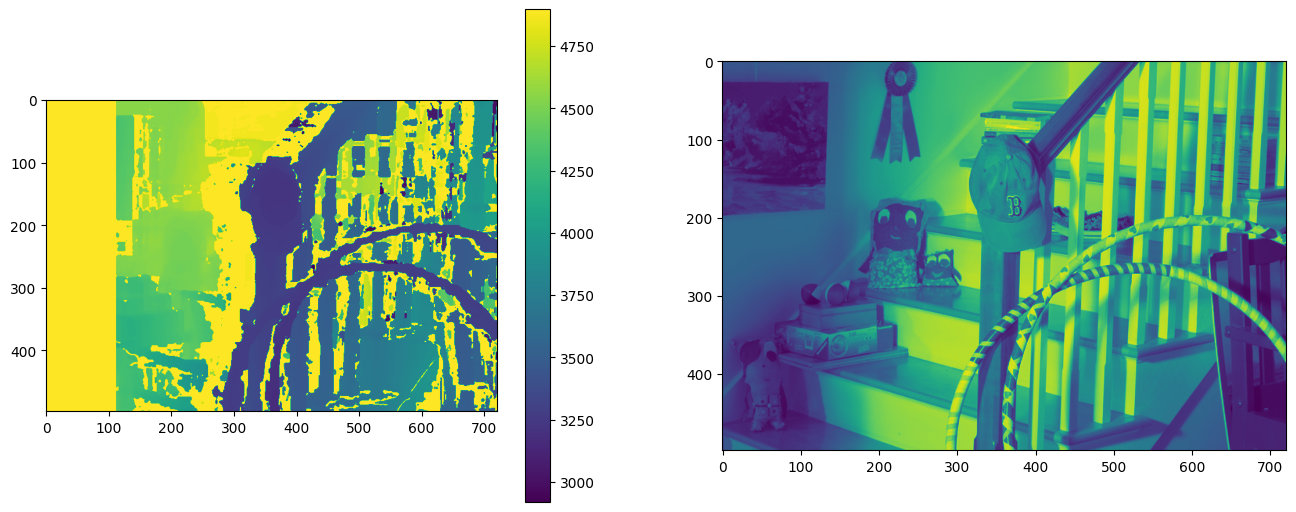

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

left = cv.imread("Hoops/im0.png")
left = cv.cvtColor(left,cv.COLOR_BGR2GRAY)
right = cv.imread("Hoops/im1.png")
right = cv.cvtColor(right,cv.COLOR_BGR2GRAY)


window_size=7
min_disp=16
nDispFactor=5
num_disp = 16*nDispFactor+min_disp

stereo = cv.StereoSGBM_create(minDisparity=min_disp,
                              numDisparities=num_disp,
                              blockSize=window_size,
                              P1=8*3*window_size**2,
                              P2=32*3*window_size**2,
                              disp12MaxDiff=1,
                              uniquenessRatio=15,
                              speckleWindowSize=0,
                              speckleRange=2,
                              preFilterCap=64,
                              mode = cv.STEREO_SGBM_MODE_SGBM_3WAY)

disparity = stereo.compute(left,right).astype(np.float32)/16.0
baseline = 383.905
doffs=126.605
focal_length = 1806.754

depth = baseline*focal_length/(disparity+doffs)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 16))
ax = axes.ravel()
img1 = ax[0].imshow(depth)
ax[1].imshow(left)
cbar = fig.colorbar(img1, ax=ax[0], shrink=0.4)

plt.show()